# Cereal Nutrition Analysis: Evaluating the Health Impact of Popular Breakfast Choices

### Setup
For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

---

### Objectives
1. **Nutritional Evaluation**: Assess and compare the nutritional content of 80 cereal products, focusing on key health indicators such as calories, sugars, protein, fat, fiber, and vitamins.

2. **Manufacturer Comparison**: Analyze and rank the nutritional profiles of different cereal manufacturers (e.g., Kellogg's, General Mills, Quaker Oats) to identify which brands offer healthier options.

3. **Consumer Preferences**: Investigate the relationship between sugar content and consumer ratings to understand how sugar levels influence consumer choices and preferences for cereals.

4. **Serving Size Impact**: Examine the correlation between serving size (in cups) and calorie content to determine how serving sizes affect nutritional value.

5. **Sodium and Health**: Analyze the impact of sodium levels on cereal ratings, identifying any trends that indicate consumer perceptions of healthfulness based on sodium content.

6. **High-Fiber Options**: Identify cereals that provide high dietary fiber with low caloric content, targeting recommendations for health-conscious consumers.

7. **Vitamin Analysis**: Explore whether cereals with higher vitamin percentages correlate with better consumer ratings, emphasizing the importance of fortified cereals.

8. **Shelf Placement Influence**: Assess if shelf placement affects consumer ratings, analyzing how product visibility may impact consumer choices in retail settings.

9. **Child-Friendly Cereals**: Identify cereals that are suitable for children based on lower sugar levels and higher vitamin content, providing recommendations for healthier breakfast options for kids.

10. **Trends in Consumer Ratings**: Examine trends in cereal ratings across different manufacturers and product types (cold vs. hot), providing insights into consumer preferences over time.

---

### Installing Required Libraries

In [77]:
%pip install folium
%pip install seaborn

### Importing Required Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

### Load the dataset

In [79]:
try:
    url = 'cereal.csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'cause_of_deaths.csv' was not found.")
    exit()
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### Display initial information

In [80]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [81]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [83]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

## Data Cleaning & Processing: To clean and organize the dataset, you can use Python libraries such as Pandas and NumPy. Here are some steps you can follow:

### Handle missing values: Use Pandas to identify and handle missing values in the dataset.

In [84]:
# Find duplicated Raws
df.duplicated().sum()

0

In [85]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

### Criteria for high nutritional value: High protein, high fiber, high vitamins, and low sugar

<Axes: title={'center': 'Top 10 Cereals by Nutritional Value'}, ylabel='name'>

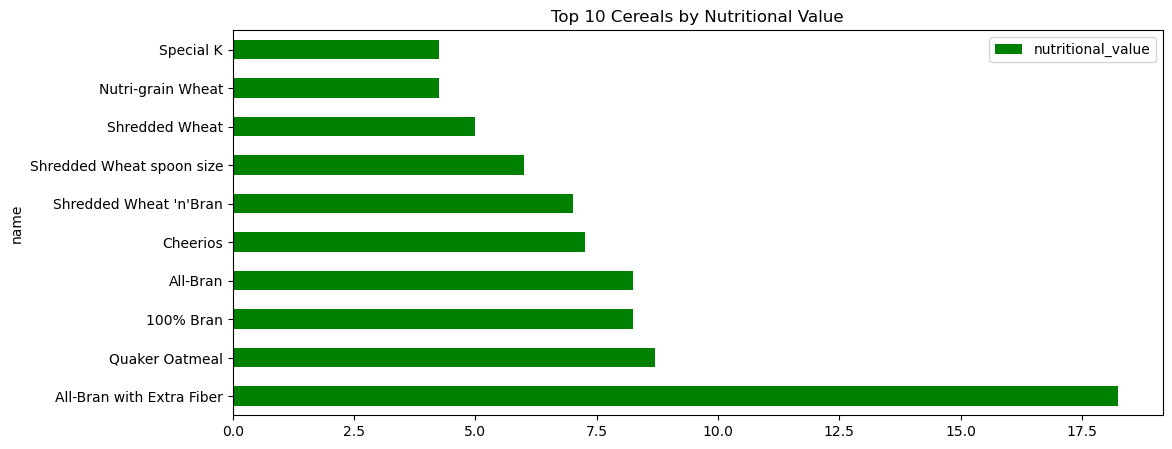

In [86]:
# Define nutritional value criteria (high protein, fiber, vitamins, low sugar)
df['nutritional_value'] = df['protein'] + df['fiber'] + (df['vitamins'] / 100) - df['sugars']

# Sort cereals by highest nutritional value
top_nutritional_cereals = df.sort_values(by='nutritional_value', ascending=False)[['name', 'nutritional_value']]

# Visualize
top_nutritional_cereals.head(10).plot(kind='barh', x='name', y='nutritional_value', title="Top 10 Cereals by Nutritional Value", color='green', figsize=(12, 5))

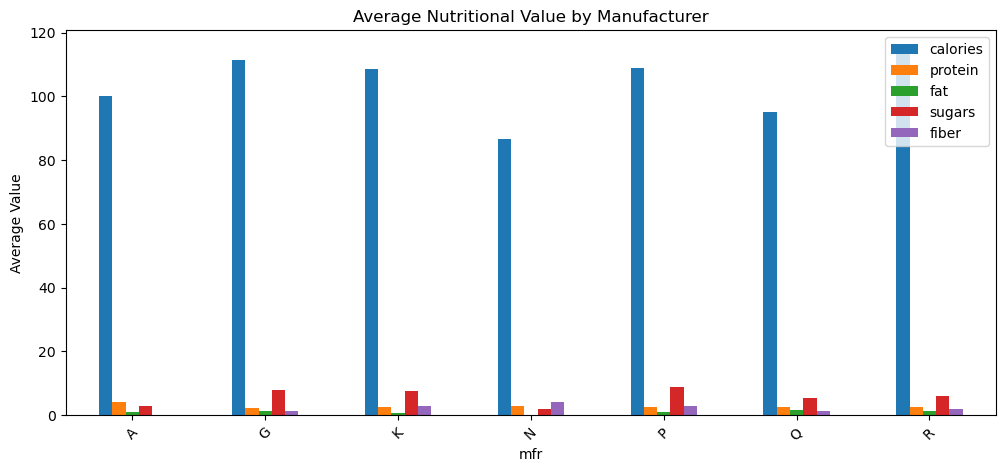

In [87]:
# Convert non-numeric columns (if needed)
numeric_columns = ['calories', 'protein', 'fat', 'sugars', 'fiber']

# Ensure numeric values in the columns (coerce errors will turn non-numeric entries into NaN)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by manufacturer and compute mean for each nutritional factor
manufacturer_nutrition = df.groupby('mfr')[numeric_columns].mean()

# Plotting the bar chart for the nutritional values by manufacturer
manufacturer_nutrition.plot(kind='bar', figsize=(12, 5))
plt.title("Average Nutritional Value by Manufacturer")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Top 10 Sugary Cereals'}, ylabel='name'>

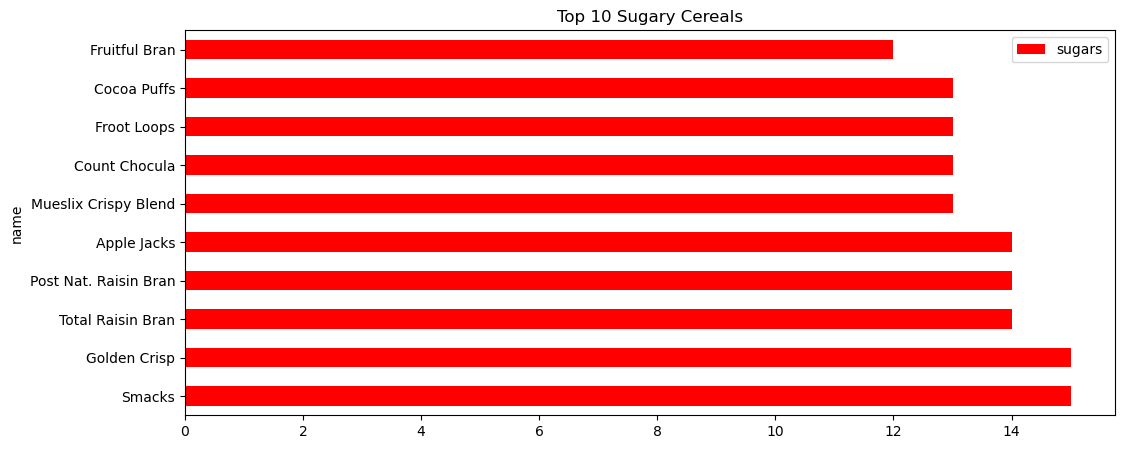

In [88]:
# Sort by sugar content
top_sugar_cereals = df.sort_values(by='sugars', ascending=False)[['name', 'sugars']]

# Visualize
top_sugar_cereals.head(10).plot(kind='barh', x='name', y='sugars', title="Top 10 Sugary Cereals", color='red', figsize=(12, 5))

### Relationship between serving size and calories

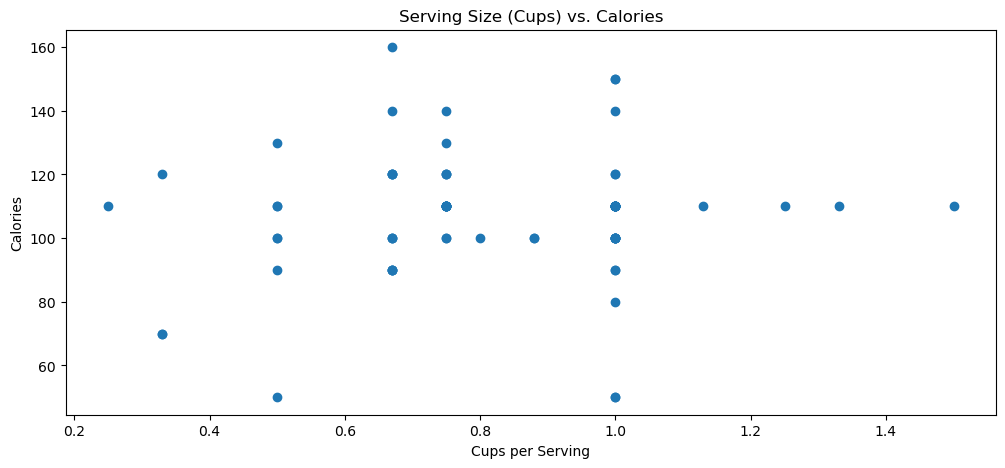

In [89]:
# Scatter plot to visualize relationship between cups and calories
plt.figure(figsize=(12,5))  
plt.scatter(df['cups'], df['calories'])
plt.title('Serving Size (Cups) vs. Calories')
plt.xlabel('Cups per Serving')
plt.ylabel('Calories')
plt.show()

### Impact of shelf placement on cereal ratings

<Axes: title={'center': 'Average Cereal Rating by Shelf Position'}, xlabel='shelf'>

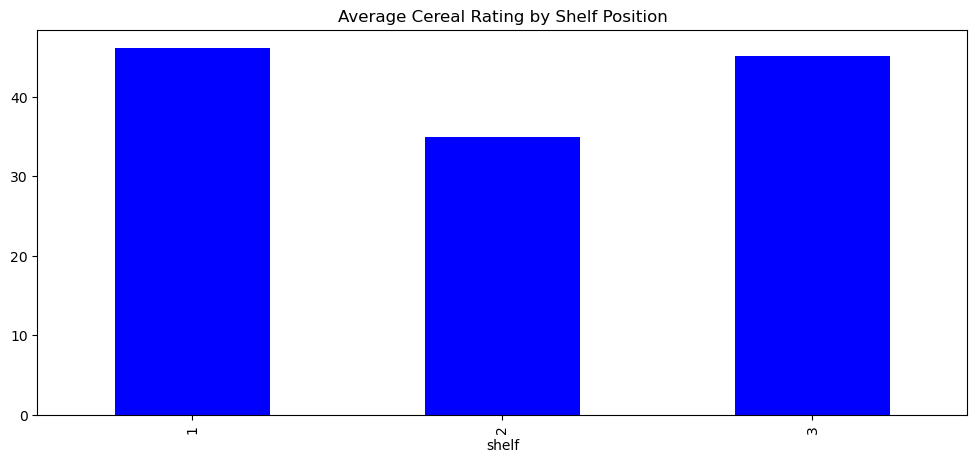

In [90]:
# Group by shelf and get average rating
shelf_rating = df.groupby('shelf')['rating'].mean()

# Visualize
shelf_rating.plot(kind='bar', title="Average Cereal Rating by Shelf Position", color='blue', figsize=(12, 5))

### Cereals high in fiber but low in calories

<Axes: title={'center': 'High Fiber and Low Calorie Cereals'}, xlabel='name'>

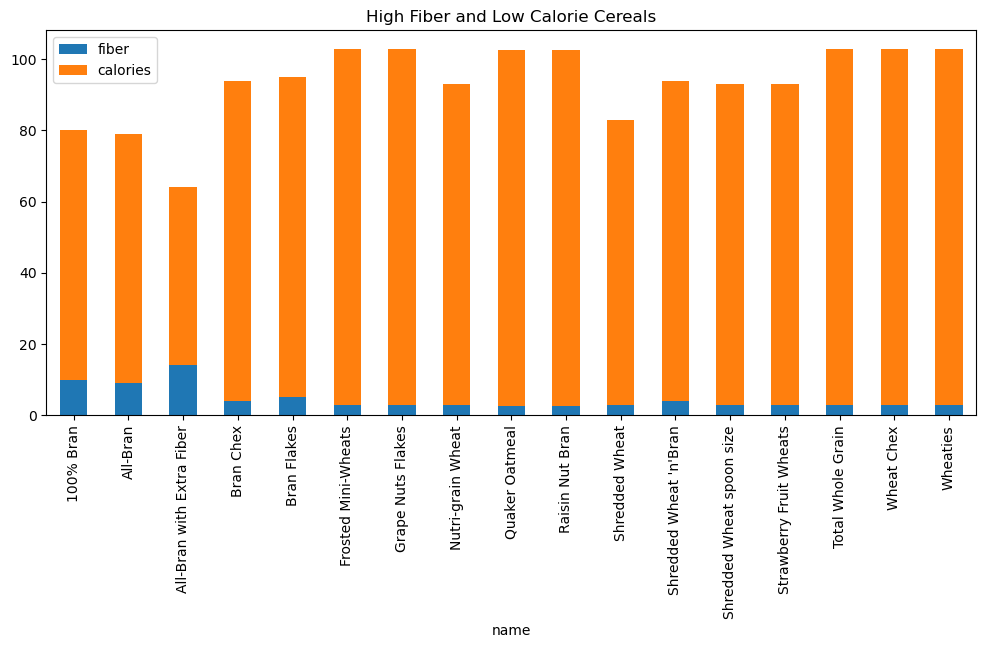

In [91]:
# Filter cereals that are high in fiber and low in calories
high_fiber_low_calories = df[(df['fiber'] > df['fiber'].mean()) & (df['calories'] < df['calories'].mean())]

# Visualize
high_fiber_low_calories[['name', 'fiber', 'calories']].plot(kind='bar', x='name', stacked=True, title="High Fiber and Low Calorie Cereals", figsize=(12, 5))

### Cereals with more vitamins and ratings

<Axes: title={'center': 'Average Rating by Vitamin Content'}, xlabel='vitamins'>

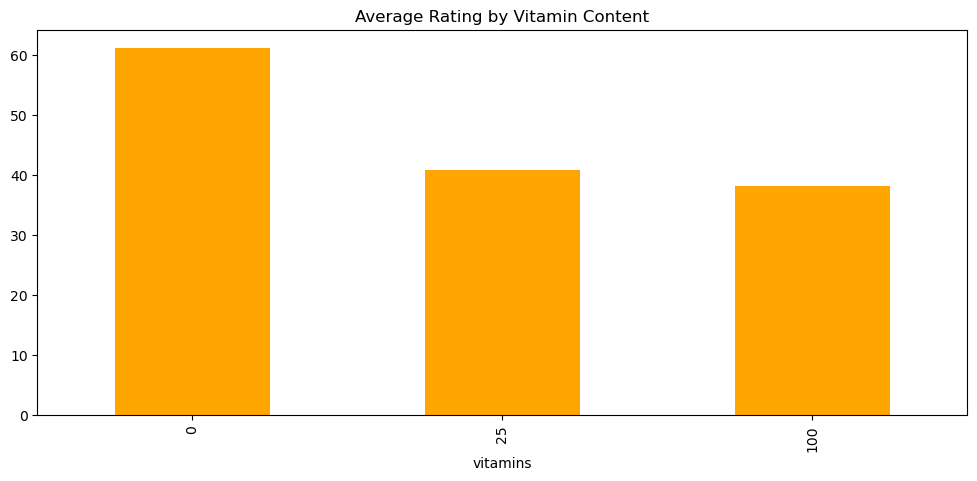

In [92]:
# Group cereals by vitamin content and get average rating
vitamin_rating = df.groupby('vitamins')['rating'].mean()

# Visualize
vitamin_rating.plot(kind='bar', title="Average Rating by Vitamin Content", color='orange', figsize=(12, 5))

### Relationship between sodium content and cereal rating

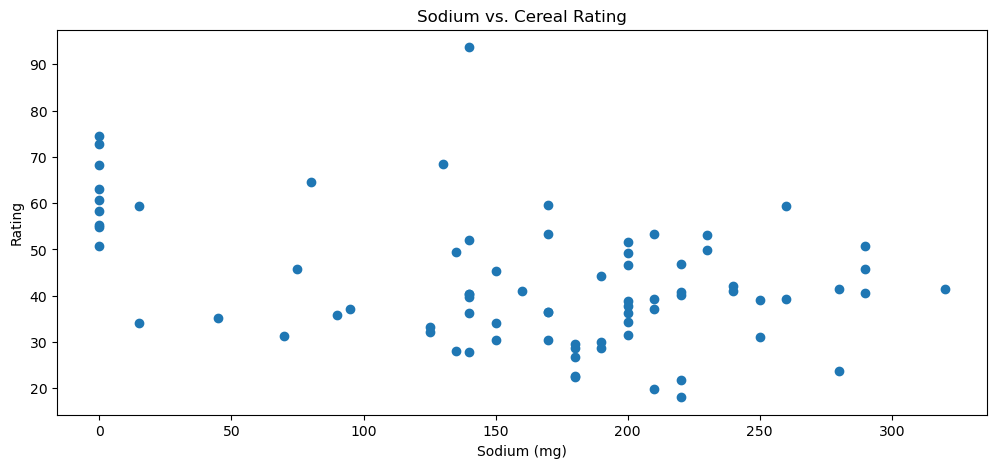

In [93]:
# Scatter plot to show relationship between sodium and rating
plt.figure(figsize=(12,5))
plt.scatter(df['sodium'], df['rating'], )
plt.title('Sodium vs. Cereal Rating')
plt.xlabel('Sodium (mg)')
plt.ylabel('Rating')
plt.show()

### Cereals most suitable for children (low sugar, high vitamins)

<Axes: title={'center': 'Cereals Suitable for Children'}, xlabel='name'>

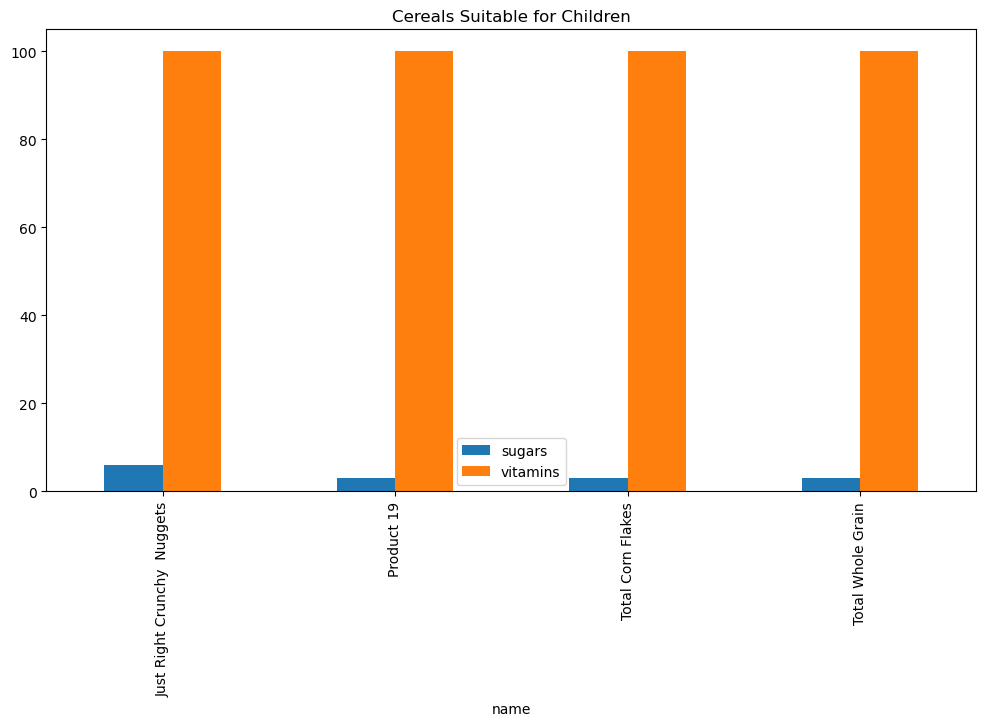

In [94]:
# Filter cereals low in sugar and high in vitamins
children_cereals = df[(df['sugars'] < df['sugars'].mean()) & (df['vitamins'] == 100)]

# Visualize
children_cereals[['name', 'sugars', 'vitamins']].plot(kind='bar', x='name', title="Cereals Suitable for Children", figsize=(12, 6))

<Axes: title={'center': 'Average Cereal Rating by Manufacturer'}, xlabel='mfr'>

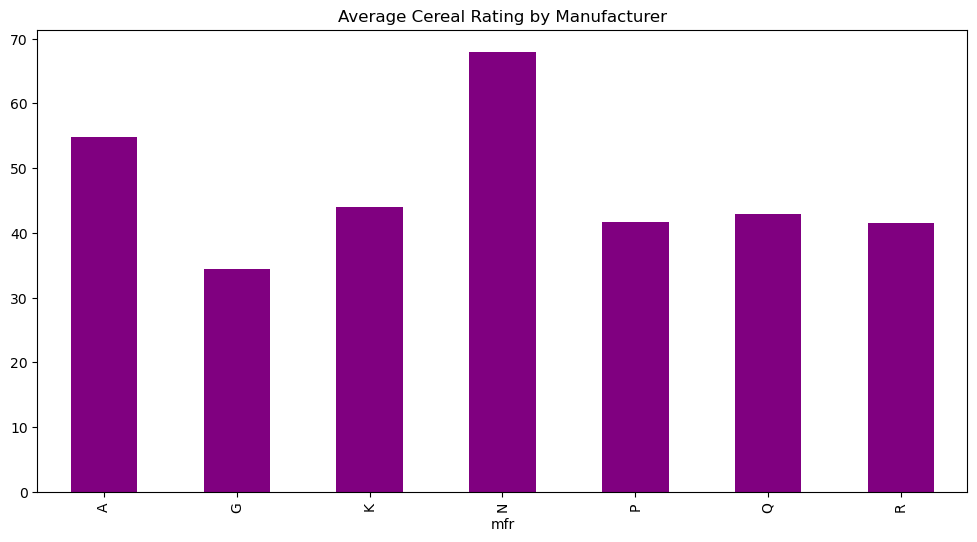

In [95]:
# Group by manufacturer and calculate average rating
manufacturer_rating = df.groupby('mfr')['rating'].mean()

# Visualize
manufacturer_rating.plot(kind='bar', title="Average Cereal Rating by Manufacturer", color='purple',figsize=(12, 6))

### Histogram of Calories

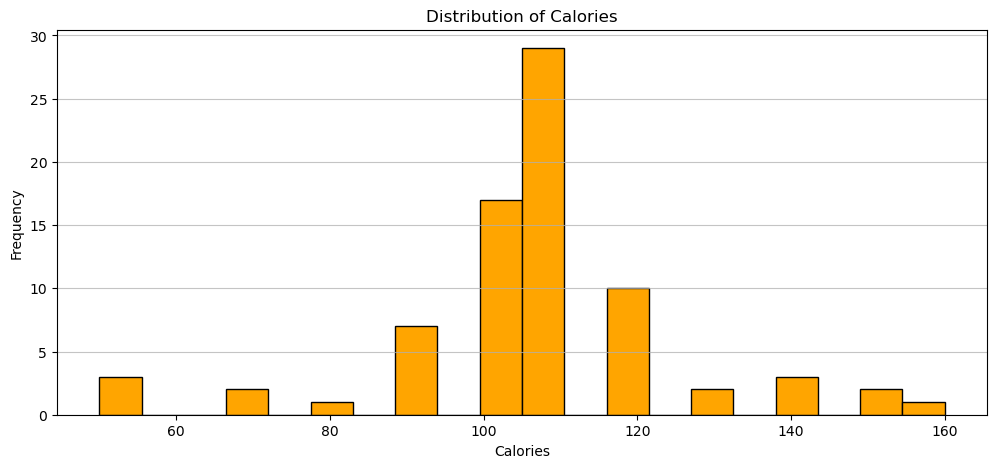

In [96]:
plt.figure(figsize=(12, 5))
plt.hist(df['calories'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Box Plot of Calories by Cups

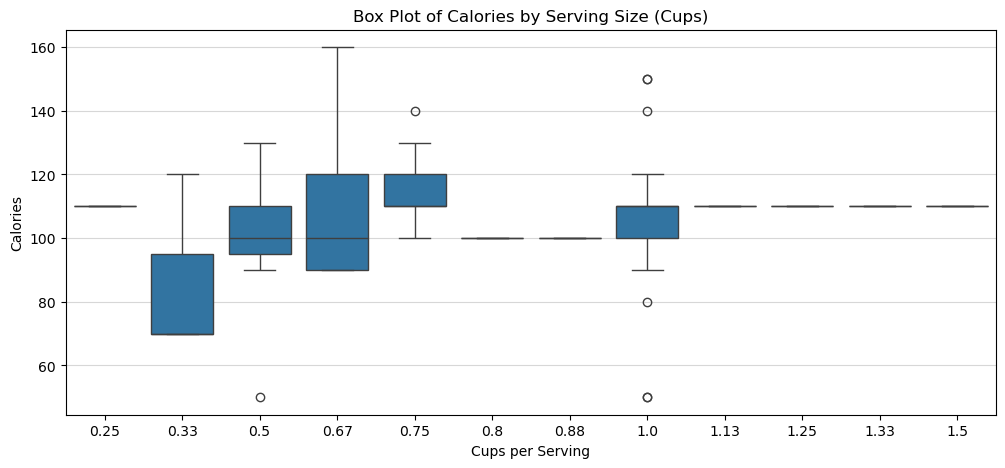

In [97]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='cups', y='calories', data=df)
plt.title('Box Plot of Calories by Serving Size (Cups)')
plt.xlabel('Cups per Serving')
plt.ylabel('Calories')
plt.grid(axis='y', alpha=0.5)
plt.show()

### Line Plot for Average Calories by Cups

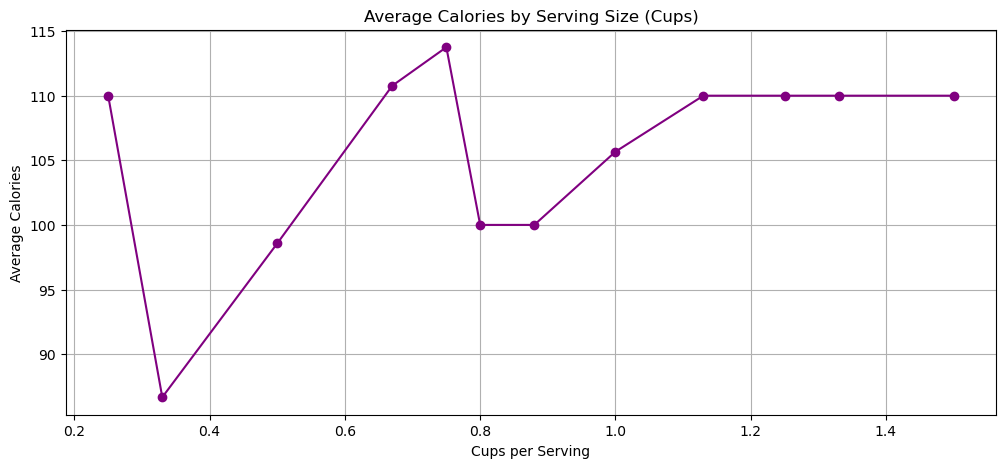

In [98]:
# Calculate the average calories per cup
avg_calories = df.groupby('cups')['calories'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(avg_calories['cups'], avg_calories['calories'], marker='o', linestyle='-', color='purple')
plt.title('Average Calories by Serving Size (Cups)')
plt.xlabel('Cups per Serving')
plt.ylabel('Average Calories')
plt.grid()
plt.show()

### Relationships among all numerical features

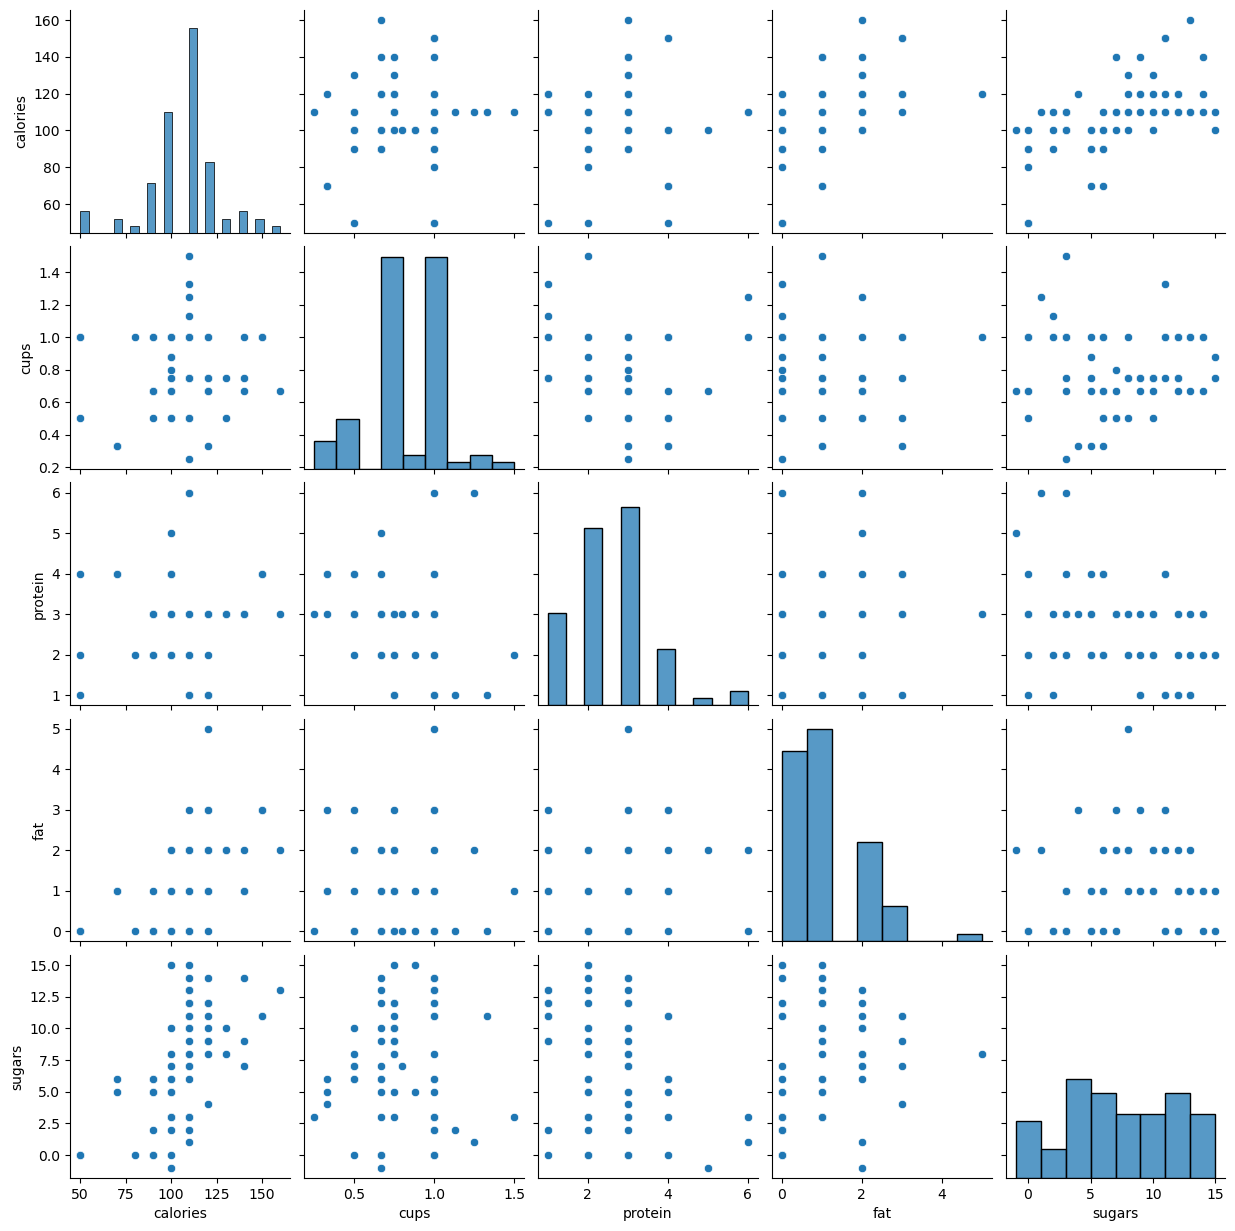

In [99]:
sns.pairplot(df[['calories', 'cups', 'protein', 'fat', 'sugars']]) 
plt.show()

### Geospatial Mapping with Folium

In [100]:
# Sample location data for manufacturers
location_data = pd.DataFrame({
    'mfr': ['General Mills', 'Kelloggs', 'Post', 'Quaker Oats', 'Nabisco'],
    'latitude': [44.98, 41.83, 40.73, 41.49, 40.85],
    'longitude': [-93.26, -87.62, -74.00, -75.57, -74.99],
})

# Create a Folium map centered on the USA
map_center = [39.8283, -98.5795]  # Approximate center of the USA
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for each manufacturer
for index, row in location_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['mfr'],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Save the map to an HTML file
m.save('cereal_manufacturers_map.html')

# Display the map
m